In [121]:
# Imports
from pathlib import Path
from scipy.io import loadmat
from scipy.signal import find_peaks, peak_widths
import scipy.stats as stats
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os
from PIL import Image

In [122]:
#test what directory code is on
print (os.getcwd())

C:\Users\jacki\OneDrive\Desktop\Jupyter_Lab


#check if the file is corrupted/you have read access
file_path = '/Users/jacqui/Desktop/Jupyter_Notebooks/Polar_Plot_Index_Histo/Group_map_4to5/Horizontal_4to5_All_OSIgrouped_VPS_data.mat'
print(os.access(file_path, os.R_OK))  # This should print True if you have read access

In [170]:
#Paths and data conversion from degrees into radians

import os
import numpy as np
from scipy.io import loadmat

# Define the file paths and corresponding labels
file_paths = {
    'control': 'D:\\Phoebe-data\\Cgrouped_VPS_data.mat',
    'vertical': 'D:\\Phoebe-data\\Vgrouped_VPS_data.mat',
    'horizontal':'D:\\Phoebe-data\\Hgrouped_VPS_data.mat'
}
# Initialize dictionaries to store the extracted and converted data
fitted_osi_angle_rad = {}
fitted_osi_angle_deg = {}
fitted_osi_angle_deg_mod = {}
mirrored_deg = {}


# Loop through each dataset
for label, path in file_paths.items():
    # Load the .mat file
    data = loadmat(path)
    
    # Access the variable
    variable = data['DEFAULTS_POST_GROUP']
    
    # Extract the specific field - ensure proper indexing
    fitted_osi_angle_rad[label] = variable['fitted_osi_angle'].item()
    
    # Convert radians into degrees
    fitted_osi_angle_deg[label] = np.rad2deg(fitted_osi_angle_rad[label])
    
    # Mirrored with flip
    #mirrored_deg[label] = np.where(fitted_osi_angle_deg[label] > 180, 
                                   #360 - fitted_osi_angle_deg[label], 
                                   #fitted_osi_angle_deg[label])
    # Mirrored without flip
    mirrored_deg[label] = np.where(fitted_osi_angle_deg[label] > 180, 
                                   fitted_osi_angle_deg[label] - 180, 
                                   fitted_osi_angle_deg[label])
    
# Modify arrays in the dictionary
for label, angles in mirrored_deg.items():
    # Filter values between 0 and 25
    mask = (angles >= 0) & (angles <= 25)
    
    # Modify the values: add 180 to filtered values
    modified_angles = np.where(mask, angles + 180, angles)
    
    # Update the dictionary with the modified array
    fitted_osi_angle_deg_mod[label] = modified_angles

# Extract the variables for each condition
fitted_osi_angle_rad_control = fitted_osi_angle_rad['control']
fitted_osi_angle_deg_control = fitted_osi_angle_deg['control']
fitted_osi_angle_deg_mod_control = fitted_osi_angle_deg_mod['control']

fitted_osi_angle_rad_vertical = fitted_osi_angle_rad['vertical']
fitted_osi_angle_deg_vertical = fitted_osi_angle_deg['vertical']
fitted_osi_angle_deg_mod_vertical = fitted_osi_angle_deg_mod['vertical']

fitted_osi_angle_rad_horizontal = fitted_osi_angle_rad['horizontal']
fitted_osi_angle_deg_horizontal = fitted_osi_angle_deg['horizontal']
fitted_osi_angle_deg_mod_horizontal = fitted_osi_angle_deg_mod['horizontal']


Plot saved as PNG to D:\Phoebe-data\overlayed_histograms_with_peaks_4to5dpf.png
Plot saved as SVG to D:\Phoebe-data\overlayed_histograms_with_peaks_4to5dpf.svg


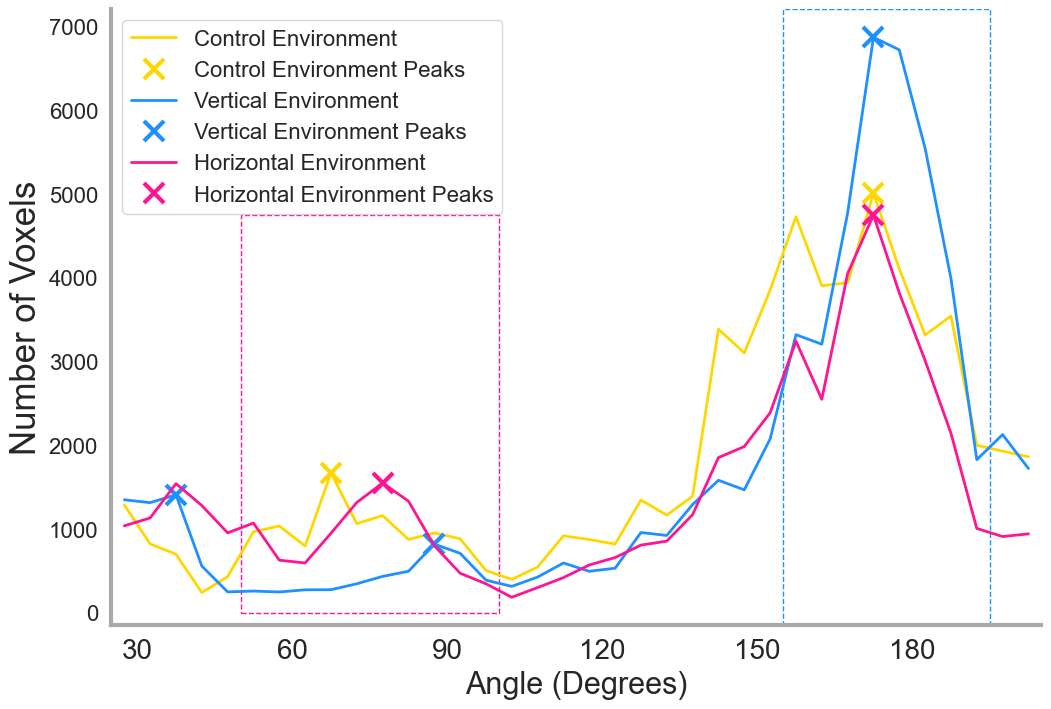

Peak data saved to D:\Phoebe-data\peak_data.xlsx


In [172]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# Assuming you have three separate datasets
datasets = [fitted_osi_angle_deg_mod_control, fitted_osi_angle_deg_mod_vertical, fitted_osi_angle_deg_mod_horizontal]
dataset_labels = ['Control Environment', 'Vertical Environment', 'Horizontal Environment']  # Labels for datasets

# Define a list of colors to differentiate the datasets in the plot
colors = ['gold', 'dodgerblue', 'deeppink']

# Specify the directory where you want to save the plots
save_dir = 'D:\Phoebe-data'  # Replace with your desired directory

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Prepare a list to store peak data for all datasets
peak_data = []

# Loop through each dataset
for i, data in enumerate(datasets):
    # Create histogram
    hist, bin_edges = np.histogram(data, bins=36, range=(25, 205))
    
    # Calculate bin centers (to represent the degrees)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Find peaks in the histogram
    peaks, _ = find_peaks(hist, distance=10)  # Adjust the distance if necessary
    
    # Collect peak data for this dataset
    for peak in peaks:
        peak_degree = bin_centers[peak]  # Convert peak index to degrees
        peak_value = hist[peak]  # Frequency value at the peak
        peak_data.append({
            'Dataset': dataset_labels[i], 
            'Peak Degree': peak_degree,
            'Frequency': peak_value
        })   
    
    # Plot the histogram
    plt.plot(bin_centers, hist, label=f'{dataset_labels[i]}', color=colors[i], linewidth = 2)
    
    # Plot the peaks
    plt.plot(bin_centers[peaks], hist[peaks], "x", color=colors[i], markersize=15,  markeredgewidth=3, label=f'{dataset_labels[i]} Peaks')

# Add labels and title
plt.xlabel('Angle (Degrees)', fontsize = 22)
plt.ylabel('Number of Voxels', fontsize = 25)
plt.grid(False)

# Set x-axis limits and ticks
plt.xlim([25, 205])
plt.xticks(np.arange(30, 210, 30), fontsize = 20)  # Start at 30 and have intervals of 30

# Set font size of y tickts
plt.yticks(fontsize = 16)  # Start at 30 and have intervals of 30

# Get y-axis limits to draw full-length rectangles
y_min, y_max = plt.ylim()

# Set font size of legend
plt.rcParams['legend.fontsize'] = 16  # Set global font size for legends

# Draw dashed rectangles around specified ranges
# Draw unfilled dashed rectangles around specified ranges
plt.gca().add_patch(plt.Rectangle((50, 0), 50, max(hist), edgecolor='deeppink', linestyle='--', fill=False))
plt.gca().add_patch(plt.Rectangle((155, y_min), 40, y_max - y_min, edgecolor='dodgerblue', linestyle='--', fill=False))

# Remove borders (top, right, left, and bottom)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['left'].set_color('darkgrey')
plt.gca().spines['bottom'].set_color('darkgrey')

# Add legend and display the plot
plt.legend()

# Save the figure in the specified directory as PNG and SVG
if not os.path.exists(save_dir):
    print(f"Error: The directory {save_dir} does not exist.")
else:
    save_path_png = os.path.join(save_dir, 'overlayed_histograms_with_peaks_4to5dpf.png')
    save_path_svg = os.path.join(save_dir, 'overlayed_histograms_with_peaks_4to5dpf.svg')
    plt.savefig(save_path_png)  # Save as PNG
    plt.savefig(save_path_svg)  # Save as SVG
    print(f"Plot saved as PNG to {save_path_png}")
    print(f"Plot saved as SVG to {save_path_svg}")
    
    plt.show()

# Close the plot
plt.close()

# Convert the collected peak data to a DataFrame
df_peak_data = pd.DataFrame(peak_data)

# Save the DataFrame to an Excel file
excel_path = os.path.join(save_dir, 'peak_data.xlsx')
df_peak_data.to_excel(excel_path, index=False)
print(f"Peak data saved to {excel_path}")

In [161]:
df_peak_data

,Dataset,Peak Degree,Frequency
0,Control,37.5,726
1,Control,87.5,1183
2,Control,182.5,1116
3,Vertical,57.5,275
4,Vertical,112.5,470
5,Vertical,172.5,2079
6,Horizontal,87.5,640
7,Horizontal,172.5,1383


In [162]:
#PICKING OUT PEAKS FOR INDEX 
#pick the range depending on your data; make it so only one value is picked up for each peak

#save the peak numbers in an array and make a formula to create a vertical prefenrence index 
df = pd.DataFrame(df_peak_data)

#Control Indeces
# Filter rows where Dataset is 'Control' and Peak Index is between ?? and ??
filtered_df_1 = df[(df['Dataset'] == 'Control') & (df['Peak Degree'] >= 65) & (df['Peak Degree'] <= 120)]

# Extract Peak Value from the filtered DataFrame
control_horiz_peak_value = filtered_df_1['Frequency']

# Print the result
print("Horizontal Peak Value for Control Group:")
print(control_horiz_peak_value.values)

# Filter rows where Dataset is 'Control' and Peak Index is between ?? and ??
filtered_df_2 = df[(df['Dataset'] == 'Control') & (df['Peak Degree'] >= 160) & (df['Peak Degree'] <= 190)]

# Extract Peak Value from the filtered DataFrame
control_vert_peak_value = filtered_df_2['Frequency']

# Print the result
print("Vertical Peak Value for Control Group:")
print(control_vert_peak_value.values)



#Verical Indeces
# Filter rows where Dataset is 'Vertical' and Peak Index is between 50 and 120
filtered_df_3 = df[(df['Dataset'] == 'Vertical') & (df['Peak Degree'] >= 65) & (df['Peak Degree'] <= 120)]

# Extract Peak Value from the filtered DataFrame
vertical_horiz_peak_value = filtered_df_3['Frequency']

# Print the result
print("Horizontal Peak Value for Vertical Group:")
print(vertical_horiz_peak_value.values)

# Filter rows where Dataset is 'Vertical' and Peak Index is between 125 and 180
filtered_df_4 = df[(df['Dataset'] == 'Vertical') & (df['Peak Degree'] >= 160) & (df['Peak Degree'] <= 190)]

# Extract Peak Value from the filtered DataFrame
vertical_vert_peak_value = filtered_df_4['Frequency']

# Print the result
print("Vertical Peak Value for Vertical Group:")
print(vertical_vert_peak_value.values)



#Horizontal Indeces
# Filter rows where Dataset is 'Horizontal' and Peak Index is between 50 and 120
filtered_df_5 = df[(df['Dataset'] == 'Horizontal') & (df['Peak Degree'] >= 65) & (df['Peak Degree'] <= 120)]

# Extract Peak Value from the filtered DataFrame
horizontal_horiz_peak_value = filtered_df_5['Frequency']

# Print the result
print("Horizontal Peak Value for Horizontal Group:")
print(horizontal_horiz_peak_value.values)

# Filter rows where Dataset is 'Horizontal' and Peak Index is between 125 and 180
filtered_df_6 = df[(df['Dataset'] == 'Horizontal') & (df['Peak Degree'] >= 160) & (df['Peak Degree'] <= 190)]

# Extract Peak Value from the filtered DataFrame
horizontal_vert_peak_value = filtered_df_6['Frequency']

# Print the result
print("Vertical Peak Value for Horizontal Group:")
print(horizontal_vert_peak_value.values)



Horizontal Peak Value for Control Group:
[1183]
Vertical Peak Value for Control Group:
[1116]
Horizontal Peak Value for Vertical Group:
[470]
Vertical Peak Value for Vertical Group:
[2079]
Horizontal Peak Value for Horizontal Group:
[640]
Vertical Peak Value for Horizontal Group:
[1383]


In [163]:
#control vertical index
control_index = (control_vert_peak_value.values)/((control_vert_peak_value.values)+(control_horiz_peak_value.values))
# Store the result in a new variable as a numpy array or pandas Series
control_index_array = pd.Series(control_index)
# Print the result
print("Control Channels Vertical Angle Preference Index:")
print(control_index_array.values)

#vertical vertical index
vertical_index = vertical_vert_peak_value.values/(vertical_vert_peak_value.values+vertical_horiz_peak_value.values)
# Store the result in a new variable as a numpy array or pandas Series
vertical_index_array = pd.Series(vertical_index)
# Print the result
print("Vertical Channels Vertical Angle Preference Index:")
print(vertical_index_array.values)

#control vertical index
horizontal_index = horizontal_vert_peak_value.values/(horizontal_vert_peak_value.values+horizontal_horiz_peak_value.values)
# Store the result in a new variable as a numpy array or pandas Series
horizontal_index_array = pd.Series(horizontal_index)
# Print the result
print("Horizontal Channels Vertical Angle Preference Index:")
print(horizontal_index_array.values)


Control Channels Vertical Angle Preference Index:
[0.48542845]
Vertical Channels Vertical Angle Preference Index:
[0.81561397]
Horizontal Channels Vertical Angle Preference Index:
[0.68363816]


H OSI for control group: 3542
V OSI for control group: 3552
Control population V index: 0.5007048209754722
H OSI for vertical group: 1040
V OSI for vertical group: 6558
Vertical population V index: 0.8631218741774151
H OSI for horizontal group: 2010
V OSI for horizontal group: 4380
Horizontal population V index: 0.6854460093896714


C:\Users\jacki\AppData\Local\Temp\ipykernel_45316\3624128379.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend().set_visible(False)


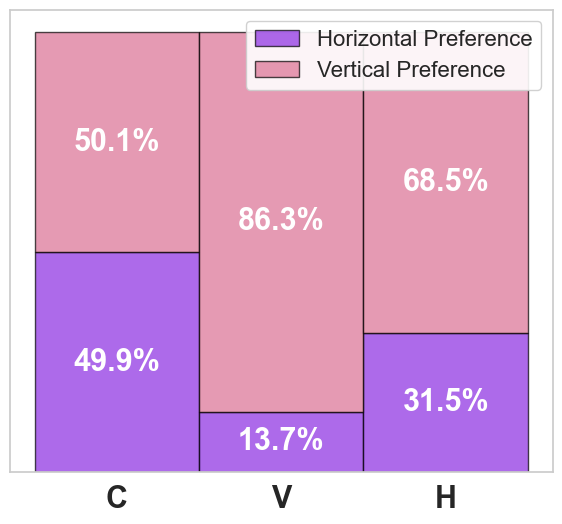

OSI percentages bar graph saved as PNG to: D:\Phoebe-data\Results\HvsV_percentages_bar_graph.png
OSI percentages bar graph saved as SVG to: D:\Phoebe-data\Results\HvsV_percentages_bar_graph.svg


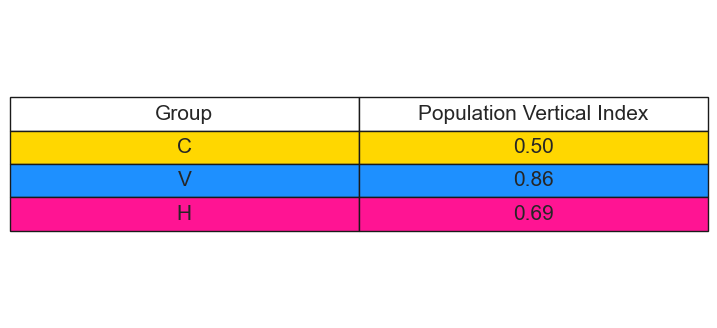

Population Vertical Index table saved as PNG to: D:\Phoebe-data\Results\population_vertical_index_table.png
Population Vertical Index table saved as SVG to: D:\Phoebe-data\Results\population_vertical_index_table.svg


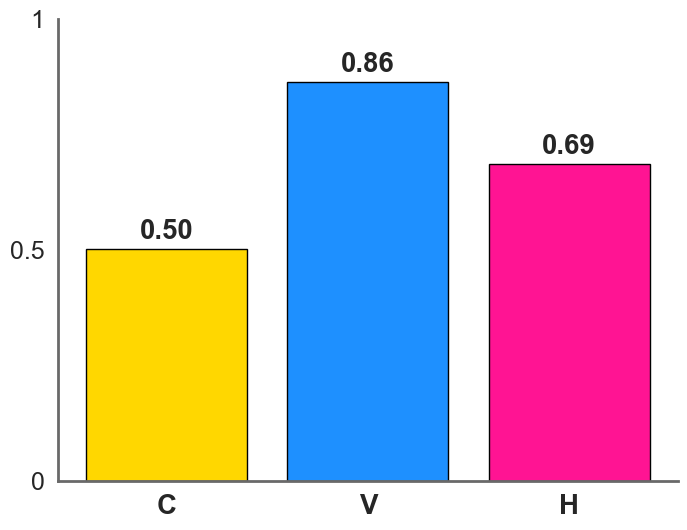

Population Vertical Index bar graph saved as PNG to: D:\Phoebe-data\Results\population_vertical_index_bar_graph.png
Population Vertical Index bar graph saved as SVG to: D:\Phoebe-data\Results\population_vertical_index_bar_graph.svg


In [164]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Assuming filtered_df_1, filtered_df_2, ..., fitted_osi_angle_deg_mod_control, etc., are defined

# Initialize lists to store data for plotting
groups = ['C', 'V', 'H']
horizontal_osi_counts = []
vertical_osi_counts = []
population_vertical_indices = []

# Control group calculations
# Horizontal OSI for control group
control_horiz_peak_index = filtered_df_1['Peak Degree']
single_value_C_horiz_peak = control_horiz_peak_index.iloc[0]  
min_val_CH = single_value_C_horiz_peak - 10
max_val_CH = single_value_C_horiz_peak + 10
num_values_in_range_CH = np.sum((fitted_osi_angle_deg_mod_control >= min_val_CH) & (fitted_osi_angle_deg_mod_control <= max_val_CH))
print(f"H OSI for control group: {num_values_in_range_CH}")

# Vertical OSI for control group
control_vert_peak_index = filtered_df_2['Peak Degree']
single_value_C_vert_peak = control_vert_peak_index.iloc[0]  
min_val_CV = single_value_C_vert_peak - 10
max_val_CV = single_value_C_vert_peak + 10
num_values_in_range_CV = np.sum((fitted_osi_angle_deg_mod_control >= min_val_CV) & (fitted_osi_angle_deg_mod_control <= max_val_CV))
print(f"V OSI for control group: {num_values_in_range_CV}")

# Control population vertical index
control_population_vertical_index = num_values_in_range_CV / (num_values_in_range_CV + num_values_in_range_CH)
print(f"Control population V index: {control_population_vertical_index}")

# Append values for plotting
horizontal_osi_counts.append(num_values_in_range_CH)
vertical_osi_counts.append(num_values_in_range_CV)
population_vertical_indices.append(control_population_vertical_index)


# Vertical group calculations
# Horizontal OSI for vertical group
vertical_horiz_peak_index = filtered_df_3['Peak Degree']
single_value_V_horiz_peak = vertical_horiz_peak_index.iloc[0]  
min_val_VH = single_value_V_horiz_peak - 10
max_val_VH = single_value_V_horiz_peak + 10
num_values_in_range_VH = np.sum((fitted_osi_angle_deg_mod_vertical >= min_val_VH) & (fitted_osi_angle_deg_mod_vertical <= max_val_VH))
print(f"H OSI for vertical group: {num_values_in_range_VH}")

# Vertical OSI for vertical group
vertical_vert_peak_index = filtered_df_4['Peak Degree']
single_value_V_vert_peak = vertical_vert_peak_index.iloc[0]  
min_val_VV = single_value_V_vert_peak - 10
max_val_VV = single_value_V_vert_peak + 10
num_values_in_range_VV = np.sum((fitted_osi_angle_deg_mod_vertical >= min_val_VV) & (fitted_osi_angle_deg_mod_vertical <= max_val_VV))
print(f"V OSI for vertical group: {num_values_in_range_VV}")

# Vertical population index for vertical group
vertical_population_vertical_index = num_values_in_range_VV / (num_values_in_range_VV + num_values_in_range_VH)
print(f"Vertical population V index: {vertical_population_vertical_index}")

# Append values for plotting
horizontal_osi_counts.append(num_values_in_range_VH)
vertical_osi_counts.append(num_values_in_range_VV)
population_vertical_indices.append(vertical_population_vertical_index)


# Horizontal group calculations
# Horizontal OSI for horizontal group
horizontal_horiz_peak_index = filtered_df_5['Peak Degree']
single_value_H_horiz_peak = horizontal_horiz_peak_index.iloc[0]  
min_val_HH = single_value_H_horiz_peak - 10
max_val_HH = single_value_H_horiz_peak + 10
num_values_in_range_HH = np.sum((fitted_osi_angle_deg_mod_horizontal >= min_val_HH) & (fitted_osi_angle_deg_mod_horizontal <= max_val_HH))
print(f"H OSI for horizontal group: {num_values_in_range_HH}")

# Vertical OSI for horizontal group
horizontal_vert_peak_index = filtered_df_6['Peak Degree']
single_value_H_vert_peak = horizontal_vert_peak_index.iloc[0]  
min_val_HV = single_value_H_vert_peak - 10
max_val_HV = single_value_H_vert_peak + 10
num_values_in_range_HV = np.sum((fitted_osi_angle_deg_mod_horizontal >= min_val_HV) & (fitted_osi_angle_deg_mod_horizontal <= max_val_HV))
print(f"V OSI for horizontal group: {num_values_in_range_HV}")

# Horizontal population vertical index
horizontal_population_vertical_index = num_values_in_range_HV / (num_values_in_range_HV + num_values_in_range_HH)
print(f"Horizontal population V index: {horizontal_population_vertical_index}")

# Append values for plotting
horizontal_osi_counts.append(num_values_in_range_HH)
vertical_osi_counts.append(num_values_in_range_HV)
population_vertical_indices.append(horizontal_population_vertical_index)


# Calculate percentages for the OSI bar plot (Horizontal vs Vertical OSI as percentages)
total_counts = np.array(horizontal_osi_counts) + np.array(vertical_osi_counts)
horizontal_percentage = np.array(horizontal_osi_counts) / total_counts * 100
vertical_percentage = np.array(vertical_osi_counts) / total_counts * 100


# Define the output directory
output_directory = r'D:\Phoebe-data\Results'
os.makedirs(output_directory, exist_ok=True)  # Create directory if it doesn't exist

### Plot 1: Horizontal vs Vertical OSI as Stacked Bar Graph ###
fig, ax1 = plt.subplots(figsize=(7, 6))

# Bar plot for Horizontal vs Vertical OSI percentages
x = np.arange(len(groups))  # Label locations
width = 1.0  # No gap between bars

# Horizontal OSI bars
ax1.bar(x, horizontal_percentage, width, color='blueviolet', edgecolor='black', alpha=0.7)

# Vertical OSI bars stacked on top of horizontal OSI bars
ax1.bar(x, vertical_percentage, width, bottom=horizontal_percentage, color='palevioletred', edgecolor='black', alpha=0.7)

# Remove the y-axis, grid, and legend
ax1.yaxis.set_visible(False)
ax1.grid(False)
ax1.legend().set_visible(False)

# Set x-axis ticks
ax1.set_xticks(x)
ax1.set_xticklabels(groups, fontweight='bold', fontsize = 22)

# Add value annotations to the bars with additional text
for i in range(len(groups)):
    # Horizontal OSI annotation
    ax1.text(i, horizontal_percentage[i] / 2, f'{horizontal_percentage[i]:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold', fontsize = 22)

    # Vertical OSI annotation
    ax1.text(i, horizontal_percentage[i] + vertical_percentage[i] / 2, 
             f'{vertical_percentage[i]:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold', fontsize = 22)

# Create the legend with semi-transparent background
legend_labels = ['Horizontal Preference','Vertical Preference']
legend_colors = ['palevioletred', 'blueviolet']

# Add legend in the upper right corner of the plot
legend = ax1.legend(legend_labels, loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.5)

# Make the legend semi-transparent
frame = legend.get_frame()
frame.set_alpha(0.9)  # Set the transparency of the legend's background

# Save the OSI percentage bar graph as PNG and SVG
output_image_path1_png = os.path.join(output_directory, 'HvsV_percentages_bar_graph.png')
output_image_path1_svg = os.path.join(output_directory, 'HvsV_percentages_bar_graph.svg')
plt.savefig(output_image_path1_png, dpi=600)
plt.savefig(output_image_path1_svg, format='svg')
plt.show()
plt.close(fig)
print(f"OSI percentages bar graph saved as PNG to: {output_image_path1_png}")
print(f"OSI percentages bar graph saved as SVG to: {output_image_path1_svg}")


### Plot 2: Population Vertical Index as Table ###
fig, ax2 = plt.subplots(figsize=(6, 4))
ax2.axis('off')  # Turn off the axis for the table

# Data for the table
table_data = [['C', f'{population_vertical_indices[0]:.2f}'],
              ['V', f'{population_vertical_indices[1]:.2f}'],
              ['H', f'{population_vertical_indices[2]:.2f}']]

# Add the table with different colors for each row
table = ax2.table(cellText=table_data, colLabels=['Group', 'Population Vertical Index'], loc='center', cellLoc='center')

# Define colors for each row
row_colors = ['gold', 'dodgerblue', 'deeppink']

# Set the colors for each row
for i, color in enumerate(row_colors):
    table[(i + 1, 0)].set_facecolor(color)  # Group column
    table[(i + 1, 1)].set_facecolor(color)  # Vertical index column

# Adjust font size and scale
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1.5, 2)

# Save the Population Vertical Index table as PNG and SVG
output_image_path2_png = os.path.join(output_directory, 'population_vertical_index_table.png')
output_image_path2_svg = os.path.join(output_directory, 'population_vertical_index_table.svg')
plt.savefig(output_image_path2_png, dpi=600)
plt.savefig(output_image_path2_svg, format='svg')
plt.show()
plt.close(fig)
print(f"Population Vertical Index table saved as PNG to: {output_image_path2_png}")
print(f"Population Vertical Index table saved as SVG to: {output_image_path2_svg}")


### Plot 3: Population Vertical Index as Bar Graph ###
fig, ax3 = plt.subplots(figsize=(8, 6))

# Bar graph for population vertical indices
indices = np.arange(len(groups))
ax3.bar(indices, population_vertical_indices, color=['gold', 'dodgerblue', 'deeppink'], edgecolor='black')

# Set y-axis labels
ax3.set_yticks([0, 0.5, 1], labels= ('0','0.5','1'),fontsize=18)


# Set x-axis labels
ax3.set_xticks(indices)
ax3.set_xticklabels(groups, fontweight='bold', fontsize = 20)
#ax3.set_xlabel('Group')
#ax3.set_title('Population Vertical Index by Group')

# Remove y-axis, grid, and borders for a minimalist look
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(False)

# Set linewidth for left and bottom spines
ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_linewidth(2)

# Optionally, if you need to set their colors:
ax3.spines['left'].set_color('dimgrey')  # Set left spine color if needed
ax3.spines['bottom'].set_color('dimgrey')  # Set bottom spine color if needed

# Add value annotations to the bars
for i, value in enumerate(population_vertical_indices):
    ax3.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontweight='bold', fontsize = 20)

# Save the Population Vertical Index bar graph as PNG and SVG
output_image_path3_png = os.path.join(output_directory, 'population_vertical_index_bar_graph.png')
output_image_path3_svg = os.path.join(output_directory, 'population_vertical_index_bar_graph.svg')
plt.savefig(output_image_path3_png, dpi=600)
plt.savefig(output_image_path3_svg, format='svg')
plt.show()
plt.close(fig)
print(f"Population Vertical Index bar graph saved as PNG to: {output_image_path3_png}")
print(f"Population Vertical Index bar graph saved as SVG to: {output_image_path3_svg}")


Control - Peak 1: Index = 20, Value = 711, Width = 15.299715502183934 at half maximum
Control - Peak 2: Index = 52, Value = 708, Width = 12.022824124902492 at half maximum


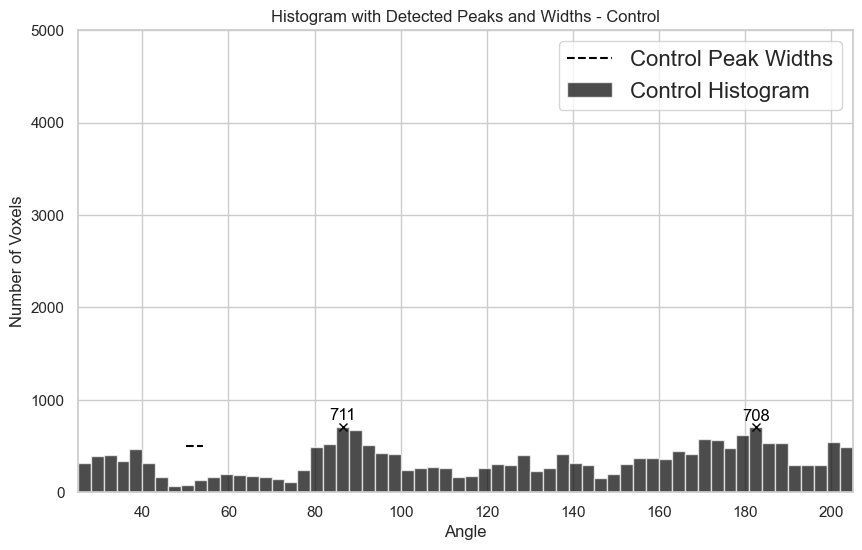

Vertical - Peak 1: Index = 18, Value = 223, Width = 5.156545598064769 at half maximum
Vertical - Peak 2: Index = 48, Value = 1307, Width = 11.632527519504583 at half maximum


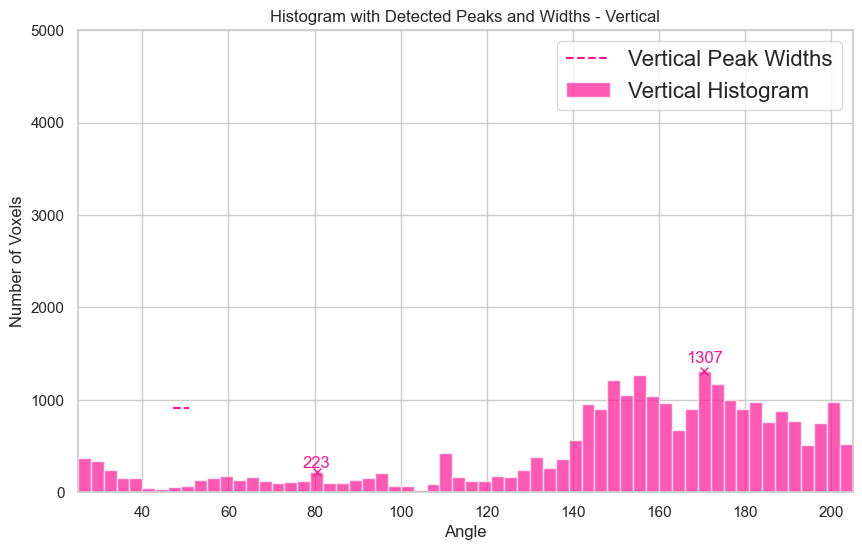

Horizontal - Peak 1: Index = 15, Value = 365, Width = 8.683976939716251 at half maximum
Horizontal - Peak 2: Index = 41, Value = 874, Width = 25.304031227847993 at half maximum


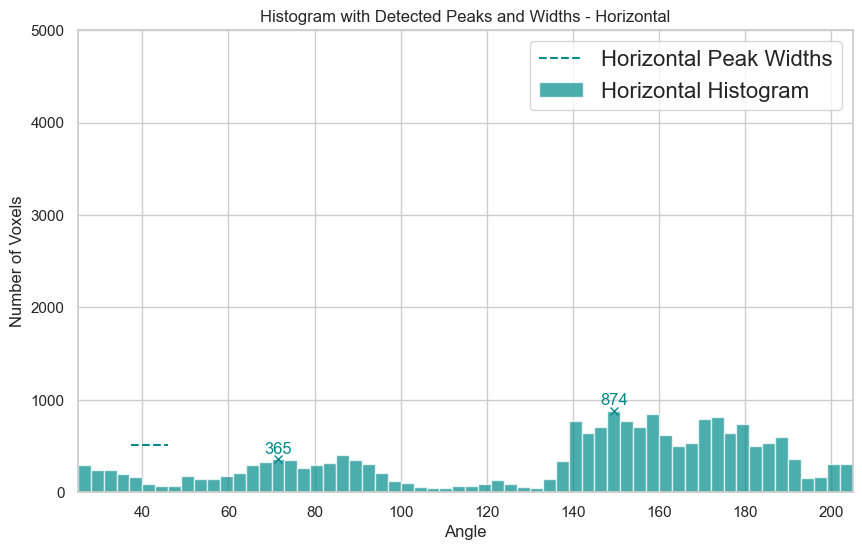

In [165]:
#generate 3 histograms like the ones from matlab; looking the peaks 

# three separate datasets
datasets = {
    'Control': fitted_osi_angle_deg_mod_control,
    'Vertical': fitted_osi_angle_deg_mod_vertical,
    'Horizontal': fitted_osi_angle_deg_mod_horizontal
}

# Define a list of colors to differentiate the histograms
colors = ['black', 'deeppink', 'darkcyan']

# Loop through each dataset and plot the histogram
for i, (label, data) in enumerate(datasets.items()):
    # Calculate the number of bins as the square root of the data length
    n_data = len(data)
    n_bins = int(np.sqrt(n_data))

    # Create histogram
    hist, bin_edges = np.histogram(data, bins=60)

    # Calculate bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Find peaks in the histogram
    peaks, _ = find_peaks(hist, distance=25)

    # Calculate the widths of the peaks
    results_half = peak_widths(hist, peaks, rel_height=0.5)

    # Convert widths to values on the x-axis (bin centers)
    widths = results_half[0] * np.diff(bin_edges).mean()

    # Print the peak indices, values, and widths
    for j, peak in enumerate(peaks):
        print(f"{label} - Peak {j+1}: Index = {peak}, Value = {hist[peak]}, Width = {widths[j]} at half maximum")

    # Create a new figure for each dataset
    plt.figure(figsize=(10, 6))

    # Plot the histogram with bars
    plt.bar(bin_centers, hist, width=np.diff(bin_edges).mean(), color=colors[i], alpha=0.7, label=f'{label} Histogram')

    # Plot the peaks
    plt.plot(bin_centers[peaks], hist[peaks], "x", color=colors[i])

    # Add text labels to the peaks
    for j, peak in enumerate(peaks):
        plt.text(bin_centers[peak], hist[peak] + 0.05 * hist[peak], f'{hist[peak]}', 
                 ha='center', va='bottom', color=colors[i])

    # Plot the peak widths at half maximum
    plt.hlines(*results_half[1:], color=colors[i], linestyle='--', label=f'{label} Peak Widths')
    

    # Add labels and title
    plt.xlabel('Angle')
    plt.ylabel('Number of Voxels')
    plt.title(f'Histogram with Detected Peaks and Widths - {label}')
    
    plt.xlim(25, 205)  # Adjust x-axis limits
    plt.ylim(0, 5000)  # Adjust y-axis limits

    # Add a legend
    plt.legend()
    
    #save files
    plt.savefig(os.path.join(save_dir, f'histogram_{label.lower()}.png'))

    # Show the plot
    plt.show()
